The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository. 

In [113]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans

from warnings import filterwarnings
filterwarnings("ignore")

pd.options.display.max_columns = 1000
pd.options.display.max_rows = 10000
pd.options.display.max_colwidth = -1

In [114]:
data=pd.read_csv("Iris.csv")
df=data.copy()
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [116]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [117]:
df.drop(["Id"],axis=1,inplace=True)

In [118]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [119]:
df.index=df["Species"]
df.drop("Species",axis=1,inplace=True)
df.rename_axis(None,axis=0,inplace=True)
df.head(61)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Iris-setosa,5.1,3.5,1.4,0.2
Iris-setosa,4.9,3.0,1.4,0.2
Iris-setosa,4.7,3.2,1.3,0.2
Iris-setosa,4.6,3.1,1.5,0.2
Iris-setosa,5.0,3.6,1.4,0.2
Iris-setosa,5.4,3.9,1.7,0.4
Iris-setosa,4.6,3.4,1.4,0.3
Iris-setosa,5.0,3.4,1.5,0.2
Iris-setosa,4.4,2.9,1.4,0.2
Iris-setosa,4.9,3.1,1.5,0.1


In [120]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


array([[<AxesSubplot:title={'center':'SepalLengthCm'}>,
        <AxesSubplot:title={'center':'SepalWidthCm'}>],
       [<AxesSubplot:title={'center':'PetalLengthCm'}>,
        <AxesSubplot:title={'center':'PetalWidthCm'}>]], dtype=object)

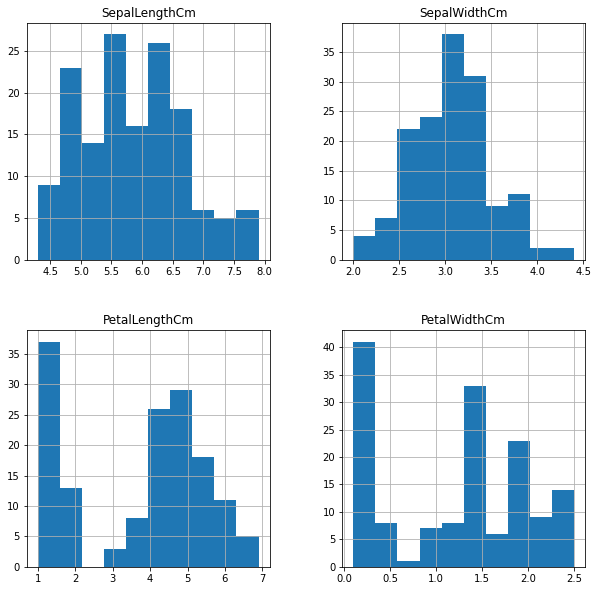

In [121]:
df.hist(figsize=(10,10))

In [123]:
km_model=KMeans(n_clusters=3,random_state=42).fit(df)
km_model.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 10,
 'n_jobs': 'deprecated',
 'precompute_distances': 'deprecated',
 'random_state': 42,
 'tol': 0.0001,
 'verbose': 0}

In [124]:
km_model.cluster_centers_


array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [125]:
km_model.labels_ # prediction !

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

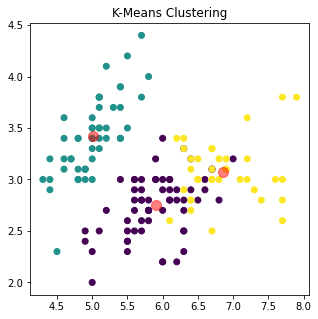

In [126]:
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=km_model.labels_,cmap='viridis')

centers=km_model.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c="red",s=100,alpha=0.5)
plt.title("K-Means Clustering");

### Visualization 3D

In [127]:
from mpl_toolkits.mplot3d import Axes3D
km_model2 = KMeans(n_clusters=3).fit(df)
labels=km_model.labels_
centers=km_model.cluster_centers_

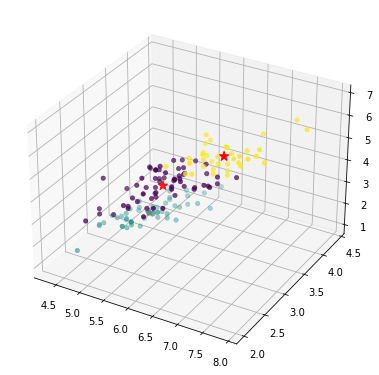

In [128]:
plt.rcParams['figure.figsize']=(5,5)
fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(df.iloc[:,0],df.iloc[:,1],df.iloc[:,2],c=labels,linewidth=0.5);
ax.scatter(centers[:,0],centers[:,1],centers[:,2], marker="*",c="red",s=100)

### Evaluation 

In [129]:
km_model2 = KMeans(n_clusters=3).fit(df)
labels=km_model.labels_
centers=km_model.cluster_centers_

In [130]:
final_df=pd.DataFrame({
    "Species":df.index,
    "Segments":labels
})

In [131]:
final_df.groupby(["Species"])["Segments"].value_counts()

Species          Segments
Iris-setosa      1           50
Iris-versicolor  0           48
                 2           2 
Iris-virginica   2           36
                 0           14
Name: Segments, dtype: int64

In [132]:
final_df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [134]:
replace_values = {  'Iris-setosa':1, 'Iris-versicolor':0, 'Iris-virginica':2}
final_df = final_df.replace({ "Species":replace_values})  
final_df

,Species,Segments
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,1,1


In [80]:
true_false=[]
for i in range(final_df.shape[0]):
    if final_df.Species[i]==final_df.Segments[i]:
        true_false.append(1)
    else:
        true_false.append(0)
final_df["Prediction"]=true_false

In [57]:
final_df.describe() # 89% 

,Prediction
count,150.000000
mean,0.893333
std,0.309723
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [146]:
from sklearn import metrics
labels_true=final_df.Species
labels_pred=final_df.Segments
print("Evaluation Score", "= %0.2f" % metrics.adjusted_mutual_info_score(labels_true, labels_pred), "%")


Evaluation Score = 0.76 %


### Hierachical Clustering

### Model 

In [153]:
from sklearn.cluster import AgglomerativeClustering as AC
cluster=AC(n_clusters=3,affinity='euclidean',linkage='ward')
label_pred_hierachical=cluster.fit_predict(df)

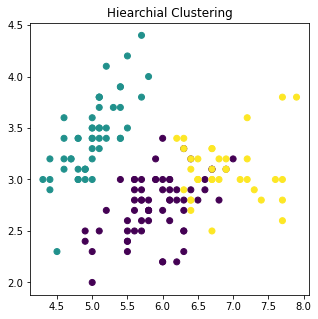

In [161]:
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=label_pred_hierachical,cmap='viridis')


plt.title("Hiearchial Clustering");

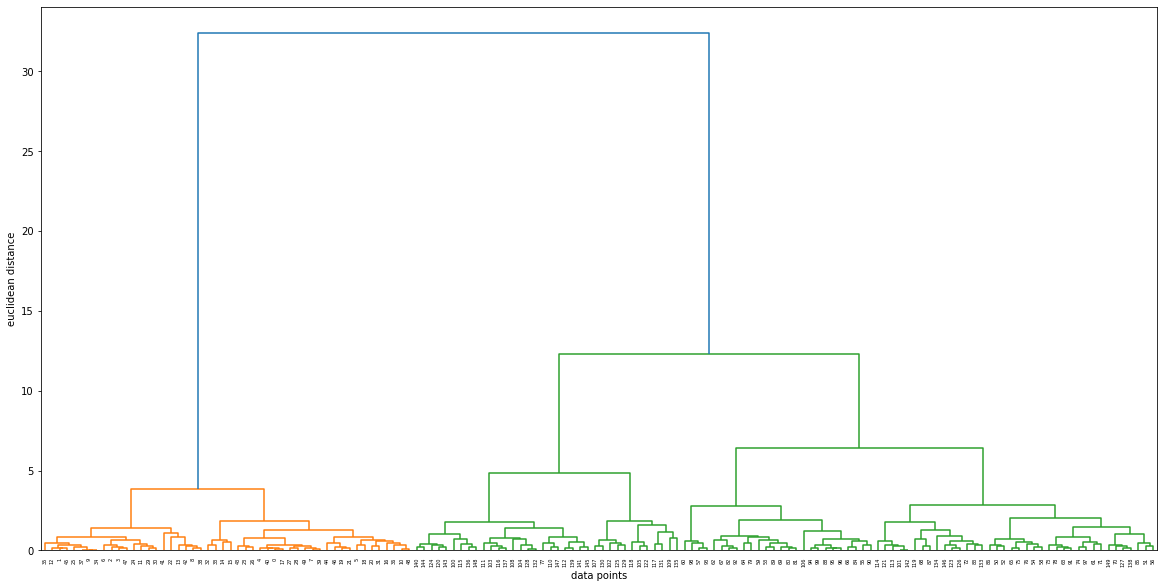

In [158]:
plt.figure(figsize=(20,10))
merg = linkage(df,method="ward")
dendrogram(merg,leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

In [154]:
from sklearn import metrics
labels_true=final_df.Species

print("Evaluation Score", "= %0.2f" % metrics.adjusted_mutual_info_score(labels_true, label_pred_hierachical), "%")


Evaluation Score = 0.77 %
